In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Page6: ロジスティック回帰モデルを一から作成してみる

In [2]:
data = pd.read_csv("busket_data.csv")

In [3]:
data.head()

,Distance,Shoot
0,0,1
1,0,1
2,0,1
3,0,1
4,0,0


まず、生のデータをプロットしてみる

In [4]:
x = data['Distance']
y = data['Shoot']

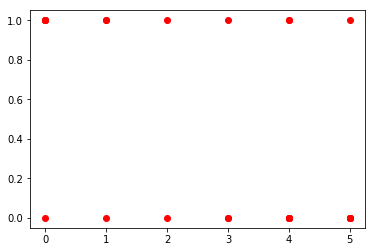

In [5]:
plt.plot(x, y, 'ro')
plt.show()

P(y=1|x)を求める

In [6]:
def isProbability(data):
    total = len(data)
    shoot_count = 0
    
    for index,row in data.iterrows():
        if row['Shoot'] == 1:
            shoot_count = shoot_count+1
    
    P = shoot_count/total
    return P

In [7]:
def isLogodds(P):
    odds = P/(1-P)
    return math.log(odds)

まずP(0)とそのlogoddsを求める。

In [8]:
data0 = data[data['Distance']==0]

In [9]:
P0 = isProbability(data0)

In [10]:
logodds0 = isLogodds(P0)
print(logodds0)

1.3862943611198908


同様に、P(1)~P(5)とそのlogoddsを求める。
あくまで理解のためなので、ループはしない。

In [11]:
data1 = data[data['Distance']==1]
P1 = isProbability(data1)
logodds1 = isLogodds(P1)
print(logodds1)

0.6931471805599452


In [12]:
data2 = data[data['Distance']==2]
P2 = isProbability(data2)
logodds2 = isLogodds(P2)
print(logodds2)

0.0


In [13]:
data3 = data[data['Distance']==3]
P3 = isProbability(data3)
logodds3 = isLogodds(P3)
print(logodds3)

-0.6931471805599454


In [14]:
data4 = data[data['Distance']==4]
P4 = isProbability(data4)
logodds4 = isLogodds(P4)
print(logodds4)

-0.9162907318741551


In [15]:
data5 = data[data['Distance']==5]
P5 = isProbability(data5)
logodds5 = isLogodds(P5)
print(logodds5)

-1.6094379124341005


結果をプロットする

In [16]:
array_logodds = [logodds0, logodds1, logodds2, logodds3, logodds4, logodds5]

In [17]:
array_x = [0, 1, 2, 3, 4, 5]

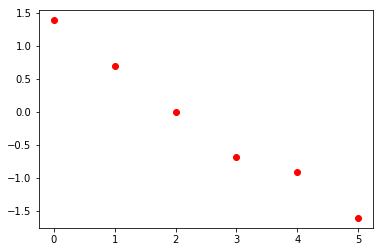

In [18]:
plt.plot(array_x, array_logodds, 'ro')
plt.show()

このプロットに最も近い直線を最二乗法により導く。なんとなくだが、以下のような直線が描けそう。

y = (-0.6)*x+1.5

つまり、シュートが入る確率は以下の式によって導かれる。

In [19]:
def learned_P(x):
    y = (-0.6)*x+1.5
    P = 1/(1+math.exp(-y))
    return P

このモデルによるDistance = 6mのとき、シュートが入る確率は以下となる。

In [20]:
learned_P(6)

0.10909682119561298